# python 处理时间序列

In [2]:
from  datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

now = datetime.now()
print(now)
print(type(now))

2020-12-23 19:44:19.562960
<class 'datetime.datetime'>


In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24)

print(delta)
print(delta.days)
print(delta.seconds)

927 days, 0:00:00
927
0


In [5]:
from datetime import timedelta

start = datetime(2011, 1, 7)
print(start + timedelta(12))

2011-01-19 00:00:00


In [7]:
stamp = datetime(2011, 1, 3)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))

2011-01-03 00:00:00
2011-01-03


In [10]:
value = '2011-01-03'
value2 = datetime.strptime(value, '%Y-%m-%d')
print(value2)
print(value2.year)

2011-01-03 00:00:00
2011


In [12]:
from dateutil.parser import parse

print(parse('2011-01-03'))
print(parse('2011/01/03'))
print(parse('Jan 31, 1997 10:45 PM'))

2011-01-03 00:00:00
2011-01-03 00:00:00
1997-01-31 22:45:00


In [13]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [15]:
datestrs = ['7/6/2011', '8/6/2011']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [16]:
idx = pd.to_datetime(datestrs + [None])
print(idx)

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)


In [17]:
pd.isnull(idx)

array([False, False,  True])

In [48]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)

In [21]:
ts[::2]

2011-01-02   -0.193184
2011-01-07    0.503703
2011-01-10   -2.093593
dtype: float64

In [22]:
ts + ts[::2]

2011-01-02   -0.386368
2011-01-05         NaN
2011-01-07    1.007405
2011-01-08         NaN
2011-01-10   -4.187187
2011-01-12         NaN
dtype: float64

In [23]:
ts.index.dtype

dtype('<M8[ns]')

In [24]:
stamp = ts.index[2]
print(ts[stamp])

0.5037026828405565


In [25]:
print(ts['1/10/2011'])
print(ts['20110110'])

-2.093593471537489
-2.093593471537489


In [28]:
longer_ts = Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
# print(longer_ts['2000-07'])
print(longer_ts['2000-07':'2000-09'])

2000-07-01   -0.119803
2000-07-02    0.219543
2000-07-03   -1.128966
2000-07-04    0.560894
2000-07-05    0.474250
                ...   
2000-09-26   -0.369738
2000-09-27   -0.139594
2000-09-28    0.158991
2000-09-29    1.085510
2000-09-30    1.881354
Freq: D, Length: 92, dtype: float64


In [33]:
longer_ts[datetime(2000, 1, 7):datetime(2000, 1, 15)]

2000-01-07   -0.243819
2000-01-08    1.179146
2000-01-09   -1.849969
2000-01-10    0.789760
2000-01-11    0.383165
2000-01-12    0.013994
2000-01-13    0.230404
2000-01-14    0.142618
2000-01-15   -0.778218
Freq: D, dtype: float64

In [37]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texax', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texax,New York,Ohio
2001-05-02,2.667267,0.238427,-0.417353,0.560113
2001-05-09,0.639137,1.347785,-0.971710,-0.591135
2001-05-16,0.180251,-1.503195,-2.210841,-1.020495
2001-05-23,1.405288,-0.286554,0.183229,0.286215
2001-05-30,-2.013522,2.571702,0.301619,0.760782


In [38]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)

In [39]:
dup_ts.index.is_unique

False

In [42]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [62]:
print(ts)

ts_resampler = ts.resample('D')

list(ts_resampler)[0][0].year

2011-01-02   -0.194720
2011-01-05   -0.989871
2011-01-07    0.314291
2011-01-08   -1.886763
2011-01-10    0.418489
2011-01-12   -0.154136
dtype: float64


2011

In [68]:
index = pd.date_range('4/1/2012', '6/5/2012', freq='W-WED')
print(index)

DatetimeIndex(['2012-04-04', '2012-04-11', '2012-04-18', '2012-04-25',
               '2012-05-02', '2012-05-09', '2012-05-16', '2012-05-23',
               '2012-05-30'],
              dtype='datetime64[ns]', freq='W-WED')


In [70]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range('1/1/2000', '12/31/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30', '2000-12-29'],
              dtype='datetime64[ns]', freq='BM')

In [72]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [74]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
type(hour)
print(hour)

<Hour>


In [75]:
four_hours = Hour(4)
print(four_hours)

In [76]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [78]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
print(rng)

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


In [80]:
ts = Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
print(ts)

2000-01-31   -0.955308
2000-02-29   -0.584367
2000-03-31    0.788696
2000-04-30   -0.469919
Freq: M, dtype: float64


In [82]:
print(ts.shift(2))
print(ts.shift(-2))

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.955308
2000-04-30   -0.584367
Freq: M, dtype: float64
2000-01-31    0.788696
2000-02-29   -0.469919
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64


In [83]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.388295
2000-03-31   -2.349659
2000-04-30   -1.595818
Freq: M, dtype: float64

In [84]:
ts.shift(2, freq='M')

2000-03-31   -0.955308
2000-04-30   -0.584367
2000-05-31    0.788696
2000-06-30   -0.469919
Freq: M, dtype: float64

In [85]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [86]:
offset = MonthEnd()

ts = Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.457826
2000-02-29   -0.476799
2000-03-31   -0.414587
dtype: float64

In [87]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [88]:
tz = pytz.timezone('UTC')

pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [5]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
print(ts.index.tz)
print(ts)

None
2012-03-09 09:30:00    0.576817
2012-03-10 09:30:00    0.433283
2012-03-11 09:30:00   -1.796670
2012-03-12 09:30:00   -0.570967
2012-03-13 09:30:00    1.489915
2012-03-14 09:30:00    1.350126
Freq: D, dtype: float64


In [6]:
ts_utc = ts.tz_localize('UTC')
print(ts_utc)

2012-03-09 09:30:00+00:00    0.576817
2012-03-10 09:30:00+00:00    0.433283
2012-03-11 09:30:00+00:00   -1.796670
2012-03-12 09:30:00+00:00   -0.570967
2012-03-13 09:30:00+00:00    1.489915
2012-03-14 09:30:00+00:00    1.350126
Freq: D, dtype: float64


In [7]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    0.576817
2012-03-10 04:30:00-05:00    0.433283
2012-03-11 05:30:00-04:00   -1.796670
2012-03-12 05:30:00-04:00   -0.570967
2012-03-13 05:30:00-04:00    1.489915
2012-03-14 05:30:00-04:00    1.350126
Freq: D, dtype: float64

In [10]:
ts.index = ts.index.tz_localize('Asia/Shanghai')
print(ts)
print(ts.index.tz)

2012-03-09 09:30:00+08:00    0.576817
2012-03-10 09:30:00+08:00    0.433283
2012-03-11 09:30:00+08:00   -1.796670
2012-03-12 09:30:00+08:00   -0.570967
2012-03-13 09:30:00+08:00    1.489915
2012-03-14 09:30:00+08:00    1.350126
Freq: D, dtype: float64
Asia/Shanghai


In [11]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
print(stamp_utc)
stamp_utc.tz_convert('US/Eastern')

2011-03-12 04:00:00+00:00


Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [12]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [14]:
print(stamp_utc.value)
stamp_moscow = stamp_utc.tz_convert('Europe/Moscow')
print(stamp_moscow.value)

1299902400000000000
1299902400000000000


In [15]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
print(stamp)
print(stamp + Hour(2)) # retrait one hour

2012-11-04 00:30:00-04:00
2012-11-04 01:30:00-05:00


In [16]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
print(ts)

2012-03-07 09:30:00    0.440392
2012-03-08 09:30:00    1.425630
2012-03-09 09:30:00   -0.286034
2012-03-12 09:30:00   -0.053870
2012-03-13 09:30:00   -0.140424
2012-03-14 09:30:00    0.598060
2012-03-15 09:30:00   -0.366665
2012-03-16 09:30:00    1.157323
2012-03-19 09:30:00   -0.714864
2012-03-20 09:30:00    1.680758
Freq: B, dtype: float64


In [19]:
p = pd.Period(2007, freq='A-DEC')

In [22]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
print(type(rng))
Series(np.random.randn(6), index=rng)

<class 'pandas.core.indexes.period.PeriodIndex'>


2000-01    1.259413
2000-02   -1.318770
2000-03   -0.180890
2000-04    1.155560
2000-05    0.168988
2000-06    2.035768
Freq: M, dtype: float64

In [24]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
print(index)

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')


In [26]:
p = pd.Period('2007', freq='A-DEC')

print(p.asfreq('M', how='start'))
print(p.asfreq('M', how='end'))

2007-01
2007-12


In [27]:
p = pd.Period('2007-08', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [29]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.729070
2007    0.583636
2008   -2.088258
2009    1.081873
Freq: A-DEC, dtype: float64

In [30]:
ts.asfreq('M', how='start')

2006-01    0.729070
2007-01    0.583636
2008-01   -2.088258
2009-01    1.081873
Freq: M, dtype: float64

In [31]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(len(rng)), index=rng)

pts = ts.to_period()
print(ts)
print(pts)

2000-01-31   -0.017439
2000-02-29    1.178674
2000-03-31    1.417966
Freq: M, dtype: float64
2000-01   -0.017439
2000-02    1.178674
2000-03    1.417966
Freq: M, dtype: float64


In [33]:
# downsapling and upsampling
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
print(ts)

2000-01-01    0.505581
2000-01-02   -0.562626
2000-01-03    0.823548
2000-01-04   -0.651255
2000-01-05   -0.312894
                ...   
2000-04-05    1.020346
2000-04-06    0.456201
2000-04-07   -0.584183
2000-04-08   -0.259430
2000-04-09    0.667247
Freq: D, Length: 100, dtype: float64


In [36]:
ts.resample('M', how='mean', kind='period')

2000-01   -0.159066
2000-02    0.253561
2000-03   -0.174808
2000-04    0.574904
Freq: M, dtype: float64

In [35]:
ts.resample('4D', how='mean')

2000-01-01    0.028812
2000-01-05   -0.517072
2000-01-09   -0.358267
2000-01-13   -1.217796
2000-01-17   -0.165609
2000-01-21    0.592602
2000-01-25   -0.068778
2000-01-29    0.896663
2000-02-02    0.562169
2000-02-06   -0.162701
2000-02-10   -0.567383
2000-02-14   -0.062781
2000-02-18    0.730784
2000-02-22    0.188140
2000-02-26    0.726771
2000-03-01    0.017887
2000-03-05    0.331354
2000-03-09   -0.046658
2000-03-13   -0.589808
2000-03-17   -0.477768
2000-03-21   -1.118179
2000-03-25    0.322576
2000-03-29    0.311722
2000-04-02    1.117690
2000-04-06    0.069959
Freq: 4D, dtype: float64

In [ ]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.random.randn(len(rng)), index=rng)

# downsample into per 5 minutes
ts.resample('5min', how='sum')

In [40]:
rng = pd.date_range('1/1/2000', periods=366, freq='D')
print(rng)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-22', '2000-12-23', '2000-12-24', '2000-12-25',
               '2000-12-26', '2000-12-27', '2000-12-28', '2000-12-29',
               '2000-12-30', '2000-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')


In [47]:
ts = Series(np.arange(len(rng)), index=rng)
ts.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=366)

In [48]:
ts.groupby(ts.index.month).mean()

1      15.0
2      45.0
3      75.0
4     105.5
5     136.0
6     166.5
7     197.0
8     228.0
9     258.5
10    289.0
11    319.5
12    350.0
dtype: float64

In [49]:
ts.groupby(lambda x : x.month).mean()

1      15.0
2      45.0
3      75.0
4     105.5
5     136.0
6     166.5
7     197.0
8     228.0
9     258.5
10    289.0
11    319.5
12    350.0
dtype: float64

In [51]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px_all.head(5)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [53]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.head(5)

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


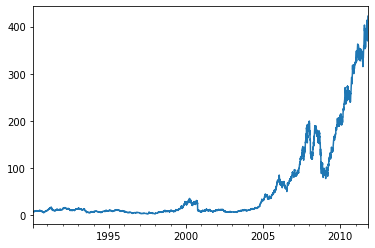

In [54]:
close_px['AAPL'].plot()

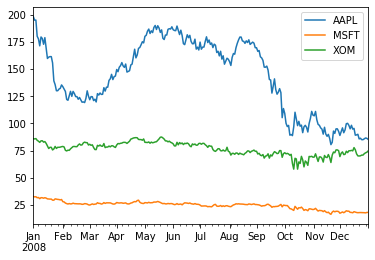

In [55]:
close_px.loc['2008'].plot()

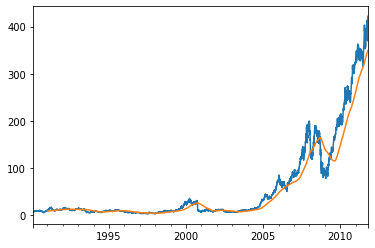

In [60]:
close_px.AAPL.plot()
Series.rolling(close_px.AAPL, window=250).mean().plot()